In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 原机本身是2.5与程序不兼容
pip install networkx==2.3

     |████████████████████████████████| 1.8MB 11.7MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556409 sha256=5419c74b3055f127ae7b2ef72d1965cb7ff93d9c144a7aa78fbe8eb9de6b972c
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.1
    Uninstalling networkx-2.1:
      Successfully uninstalled networkx-2.1


In [2]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    # 画顶点
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    # 画边
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

# 数据加载，构造图
G = nx.read_gml('/content/drive/My Drive/Colab Notebooks/dolphins.gml')

In [3]:
print(G)
print(type(G))


<class 'networkx.classes.graph.Graph'>


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


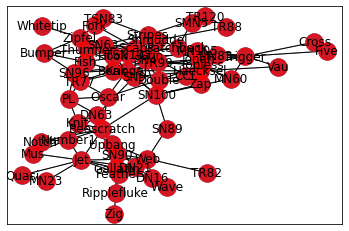

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [4]:
# 可视化
plot_graph(G)
print(list(G.nodes()))

In [5]:
print(G.nodes)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [6]:

# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [7]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [8]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]


In [9]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [10]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[ 6.28345126e-01  1.40050605e-01 -9.15211331e-01  6.29932361e-01]
 [-1.31391472e+00  6.85293033e-02 -8.33336932e-01 -9.32313043e-02]
 [ 9.83265147e-01 -5.82771923e-01 -2.77684767e-01 -7.56760160e-02]
 [ 7.09825041e-01 -6.13066018e-01 -4.34864375e-01  2.14117440e+00]
 [ 4.78629347e-01  5.09472161e-01 -2.82971504e-01 -1.51462639e-01]
 [-9.22113506e-01 -6.69165612e-01  4.15479382e-02 -1.45659926e+00]
 [-7.55214185e-01  4.29631520e-01  2.04698473e+00 -4.72274903e-01]
 [ 5.35688391e-01  4.74628664e-01  1.15057698e-01 -7.94624961e-01]
 [-7.76072049e-01  6.66799964e-01 -1.01812113e+00  4.40781316e-02]
 [-1.40578552e+00 -1.04561249e+00 -2.36976535e+00  5.29292946e-01]
 [ 3.42475921e-01  8.44703010e-01 -4.00530490e-01  2.99312455e-03]
 [-7.44777340e-01  7.28815144e-01 -1.30539788e+00 -5.79978228e-01]
 [ 1.28706158e+00 -1.20103265e+00  1.04241917e+00 -1.30893834e+00]
 [-9.38349502e-01  1.19121462e+00 -1.75134731e-01 -1.49347672e+00]
 [-3.02475417e-01 -9.34905307e-01  1.23743785e+00 -8.529

In [11]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

output=
 [[0.0850789  0.        ]
 [0.         0.        ]
 [0.16995221 0.        ]
 [0.         0.        ]
 [0.01030729 0.        ]
 [0.11345621 0.01046154]
 [0.0178185  0.02645474]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.01058613]
 [0.         0.        ]
 [0.         0.08870341]
 [0.74513574 0.        ]
 [0.         0.0107287 ]
 [0.34845033 0.        ]
 [0.         0.        ]
 [0.4240107  0.        ]
 [0.         0.        ]
 [0.0875471  0.        ]
 [0.         0.        ]
 [0.24276106 0.        ]
 [0.18052513 0.        ]
 [0.         0.11659682]
 [0.         0.        ]
 [0.12115128 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.06908022 0.        ]
 [0.16450372 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.36469086 0.        ]
 [0.37170638 0.        ]
 [0.         0.        ]
 [0.2417964  0.        ]
 [0.         0. 

In [12]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.0850789, 0.       ]), 'Beescratch': array([0., 0.]), 'Bumper': array([0.16995221, 0.        ]), 'CCL': array([0., 0.]), 'Cross': array([0.01030729, 0.        ]), 'DN16': array([0.11345621, 0.01046154]), 'DN21': array([0.0178185 , 0.02645474]), 'DN63': array([0., 0.]), 'Double': array([0., 0.]), 'Feather': array([0.        , 0.01058613]), 'Fish': array([0., 0.]), 'Five': array([0.        , 0.08870341]), 'Fork': array([0.74513574, 0.        ]), 'Gallatin': array([0.       , 0.0107287]), 'Grin': array([0.34845033, 0.        ]), 'Haecksel': array([0., 0.]), 'Hook': array([0.4240107, 0.       ]), 'Jet': array([0., 0.]), 'Jonah': array([0.0875471, 0.       ]), 'Knit': array([0., 0.]), 'Kringel': array([0.24276106, 0.        ]), 'MN105': array([0.18052513, 0.        ]), 'MN23': array([0.        , 0.11659682]), 'MN60': array([0., 0.]), 'MN83': array([0.12115128, 0.        ]), 'Mus': array([0., 0.]), 'Notch': array([0., 0.]), 'Number1': array([0., 0.]

In [13]:
#因为dolphins.gml文件中并没有value列，故无法通过value与color的对应关系绘制颜色
# 不同节点value，绘制不同的颜色
# def getValue(value):
#     colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
#     return colorList[int(value)]
# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        # value = G.nodes[node_name]['value']
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        # plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),color = getValue(value),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()

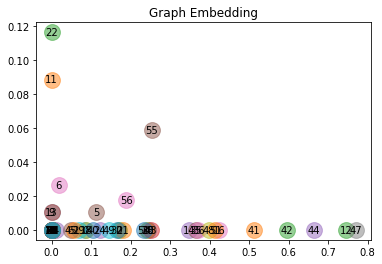

In [14]:
plot_node(output, 'Graph Embedding')

output(去掉relu)=
: [[ 1.02929509 -0.23067762]
 [ 0.03304069  0.15126884]
 [ 1.45518746 -0.28626073]
 [-0.21338083 -0.26913848]
 [ 0.13590278 -0.14996074]
 [ 1.18131092  0.54541334]
 [ 0.76731176  0.40995989]
 [ 0.83611797 -0.02396926]
 [ 0.22551778  0.0492609 ]
 [ 0.24829495  0.38845007]
 [ 0.95637164 -0.17734717]
 [-0.00797473  0.14654349]
 [ 2.98154153 -0.73950722]
 [ 0.2569847   0.35401947]
 [ 1.6865734  -0.27709143]
 [ 0.37803864 -0.06146547]
 [ 1.78523908 -0.12557393]
 [-0.1946016   0.08177158]
 [ 0.41592618  0.0420257 ]
 [ 0.75276185  0.02011069]
 [ 1.26478379  0.16318284]
 [ 0.87389431 -0.1591473 ]
 [ 0.30469258  0.34337314]
 [ 0.33126748 -0.12506706]
 [ 0.3797093  -0.04737453]
 [-0.92195892  0.02296653]
 [-1.05756913 -0.10308844]
 [-0.50650216 -0.0050046 ]
 [ 0.43534716  0.23213043]
 [ 1.30685972  0.17716365]
 [ 0.72428462 -0.19517152]
 [-1.28749231 -0.07479664]
 [-0.07977437  0.49921123]
 [-0.33870462 -0.13930986]
 [-0.05279563 -0.24461699]
 [ 1.55393307 -0.33444848]
 [ 1.60672

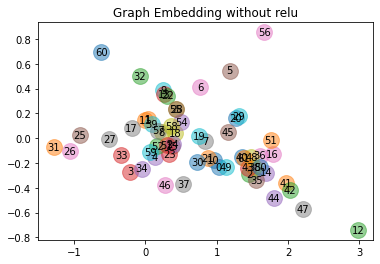

In [15]:
# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')

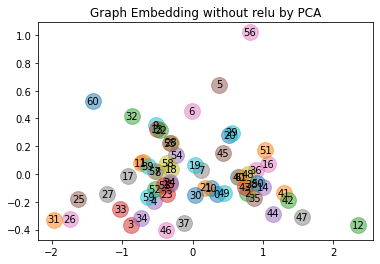

In [18]:
#通过PCA的方式进行降维，由于本身的matrix就是二维的 所以效果并不是很明显
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
output_pca = pca.fit_transform(output)
plot_node(output_pca, 'Graph Embedding without relu by PCA')